<a href="https://colab.research.google.com/github/basharbayatna/MachineLearning-for-Boston-Housing-Dataset/blob/main/Boston_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import linear regression model
from sklearn.linear_model import LinearRegression
# import regression metrics needed from sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/02-IntroML/Week06/Data/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(fpath)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


- Heatmap

In [ ]:
correlation= df.corr(numeric_only=True)
correlation.round(2)

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.00,0.42,-0.22,0.35,0.29,0.46,-0.39
NOX,0.42,1.00,-0.30,0.73,0.19,0.59,-0.43
RM,-0.22,-0.30,1.00,-0.24,-0.36,-0.61,0.70
AGE,0.35,0.73,-0.24,1.00,0.26,0.60,-0.38
PTRATIO,0.29,0.19,-0.36,0.26,1.00,0.37,-0.51
LSTAT,0.46,0.59,-0.61,0.60,0.37,1.00,-0.74
PRICE,-0.39,-0.43,0.70,-0.38,-0.51,-0.74,1.00


In [ ]:
filter_price_corr = correlation['PRICE'].abs()> 0.5
correlation.loc[filter_price_corr, 'PRICE']

,PRICE
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
PRICE,1.000000


In [ ]:
selected_fet = ['RM', 'PTRATIO', 'LSTAT', 'PRICE']
df_selected_fet = df[selected_fet]

In [ ]:
correlation2 = df_selected_fet.corr()
correlation2.round(2)

,RM,PTRATIO,LSTAT,PRICE
RM,1.00,-0.36,-0.61,0.70
PTRATIO,-0.36,1.00,0.37,-0.51
LSTAT,-0.61,0.37,1.00,-0.74
PRICE,0.70,-0.51,-0.74,1.00


<Axes: >

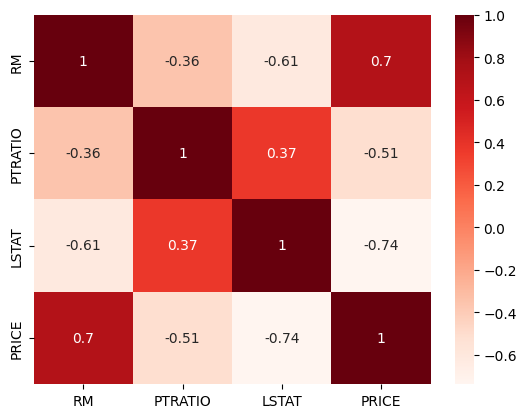

In [ ]:
sns.heatmap(correlation2, annot=True, cmap='Reds')

- Fetures and Target

In [ ]:
y = df['PRICE']
X = df[selected_fet].drop(columns='PRICE')

In [ ]:
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


- Train_Test_Solit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


No ColumnTransformwe needed
No Missing values, Categorical features or Scaling Needed.

## Using the Evaluation Function

In [ ]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics





In [ ]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

LinearReg

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
evaluate_regression(lin_reg, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 3.714
- MSE = 27.687
- RMSE = 5.262
- R^2 = 0.688

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 3.392
- MSE = 25.689
- RMSE = 5.068
- R^2 = 0.633


Regression Trees

In [ ]:
dec_tree_reg = DecisionTreeRegressor(random_state=42)

dec_tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
evaluate_regression(dec_tree_reg, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 3.846
- MSE = 38.332
- RMSE = 6.191
- R^2 = 0.453


In [ ]:
depth = dec_tree_reg.get_depth()
depth

20

Using GridSearchCV

max_depth:

(try all values from 1 - depth of the default model)

min_samples_leaf:

(1-10)

In [ ]:
dec_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,18],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]

              }


In [ ]:
gridsearch = GridSearchCV(dec_tree_reg, param_grid, n_jobs=-1, verbose=1)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 190 candidates, totalling 950 fits


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 18],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [ ]:
gridsearch.best_params_

{'max_depth': 5, 'min_samples_leaf': 5}

In [ ]:
best_model = gridsearch.best_estimator_

In [ ]:
evaluate_regression(best_model, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 2.365
- MSE = 12.181
- RMSE = 3.490
- R^2 = 0.863

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 3.052
- MSE = 20.340
- RMSE = 4.510
- R^2 = 0.710
